### Album Comparison and Analysis Report
#### Bianca Amoako
#### 11/17/2024

#### Using Spotify's API, I will be looking at the albums *Friends That Break Your Heart* by James Blake and *Sound & Color* by Alabama Shakes. 

#### *Friends That Break Your Heart* by James Blake was relevant to me when I first heard the album. It discusses the fall out of friendships and how the artist experiences the emotions that come with it. Some of the songs express confusion while other songs express stength in one's self. Ever since the album came out, in 2021, I have revisited it multiple times and the themes are timeless.

#### *Sound & Color* by Alabama Shakes is an album that has a unique sound. The lead singer of the band, Brittany Howard, has an incredible voice that gives the songs a large sense of hope and appreciation. The Amazon Prime show *Fleabag* is how I was introduced to this album through the song "This Feeling" which played at the end of the series finale.

-------
#### Calling the necessary libraries and using a function to get a session token from Spotify:

In [135]:
import json
import requests
import pandas as pd
import base64
import urllib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

def get_session_token(ClientID, ClientKey):
    url = "https://accounts.spotify.com/api/token"
    data_ = {"grant_type" : "client_credentials"}
    encoded_key = base64.b64encode(str(ClientID + ":" + ClientKey).encode("ascii"))
    headers_ = {"Authorization": "Basic {}".format(encoded_key.decode("ascii"))}

    response = requests.post(url, data = data_, headers = headers_)
    print(response.status_code)

    return response.json()["access_token"]

In [136]:
client_info = pd.read_csv("/Users/biancaamoako/Data_EMAT/Spotify_API/spotify_client_info.txt")

In [137]:
client_id = client_info["Client_ID"].iloc[0]
client_key = client_info["Client_Secret"].iloc[0]
access_token = get_session_token(client_id, client_key)

200


#### Using a function that takes a session header as "token_header" and endpoint url to make/return the API request. The session header is created by encoding the access token from above.

In [138]:
def api_request(endpoint_url, token_header):
    response = requests.get(endpoint_url, headers = token_header)
    print(response.status_code)
    
    return response.json()

#### Session header, endpoint URLs for Get Album Tracks & Get Several Tracks' Audio Features, and Album IDs.

In [139]:
session_header = {"Authorization" : "Bearer {}".format(access_token)}

#endpoints
album_tracks_ep = "https://api.spotify.com/v1/albums/{}/tracks"
sev_track_feats_ep = "https://api.spotify.com/v1/audio-features?ids={}"

#almbum ids
friends_id = "1zNtJFMCNIyT0X19jpcI3j"
sound_color_id = "0GaYG9L1sXHQZZ7BTk0hGY"

#### Get Album Tracks API request/response.

In [140]:
friends_tracks = api_request(album_tracks_ep.format(friends_id), session_header)
sound_color_tracks = api_request(album_tracks_ep.format(sound_color_id), session_header)

200
200


#### Taking the album tracks and turning them into a Pandas DataFrame so I can pull the track ids.

In [141]:
friends_album_df = pd.DataFrame(friends_tracks["items"])
sound_color_album_df = pd.DataFrame(sound_color_tracks["items"])
friends_album_df.head(3)

,artists,available_markets,disc_number,duration_ms,explicit,external_urls,href,id,name,preview_url,track_number,type,uri,is_local
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,256155,False,{'spotify': 'https://open.spotify.com/track/1a...,https://api.spotify.com/v1/tracks/1axXy2bgUSeE...,1axXy2bgUSeEN7h6Ob9Qbo,Famous Last Words,None,1,track,spotify:track:1axXy2bgUSeEN7h6Ob9Qbo,False
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,199639,False,{'spotify': 'https://open.spotify.com/track/5L...,https://api.spotify.com/v1/tracks/5LriwAnVbywA...,5LriwAnVbywAjj9oGi1Dno,Life Is Not The Same,None,2,track,spotify:track:5LriwAnVbywAjj9oGi1Dno,False
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,195905,True,{'spotify': 'https://open.spotify.com/track/2p...,https://api.spotify.com/v1/tracks/2pSsHnjAgEPj...,2pSsHnjAgEPjHmet7ChlHQ,Coming Back (feat. SZA),None,3,track,spotify:track:2pSsHnjAgEPjHmet7ChlHQ,False


#### Turning the track ids for both albums into a list of strings to pass to Get Several Tracks' Audio Features endpoint. Then creating a Pandas DataFrame from merged responses.

In [142]:
friends_track_ids = ",".join(friends_album_df["id"].tolist())
sound_color_track_ids = ",".join(sound_color_album_df["id"].tolist())

#several tracks audio features endpoint request
friends_track_feat = api_request(sev_track_feats_ep.format(friends_track_ids), session_header)
sound_color_track_feat = api_request(sev_track_feats_ep.format(sound_color_track_ids), session_header)

200
200


In [143]:
friends_df = pd.DataFrame(friends_track_feat["audio_features"])
friends_df = pd.merge(friends_df, friends_album_df[["name", "id"]], how  = "inner", on = "id")

sound_color_df = pd.DataFrame(sound_color_track_feat["audio_features"])
sound_color_df = pd.merge(sound_color_df, sound_color_album_df[["name", "id"]], how = "inner", on = "id")

In [144]:
friends_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.583,0.192,5,-12.578,0,0.0390,0.959,0.2600,0.1180,0.0398,75.534,audio_features,1axXy2bgUSeEN7h6Ob9Qbo,spotify:track:1axXy2bgUSeEN7h6Ob9Qbo,https://api.spotify.com/v1/tracks/1axXy2bgUSeE...,https://api.spotify.com/v1/audio-analysis/1axX...,256156,4,Famous Last Words
1,0.645,0.435,6,-9.872,1,0.0500,0.900,0.0141,0.0943,0.2120,143.984,audio_features,5LriwAnVbywAjj9oGi1Dno,spotify:track:5LriwAnVbywAjj9oGi1Dno,https://api.spotify.com/v1/tracks/5LriwAnVbywA...,https://api.spotify.com/v1/audio-analysis/5Lri...,199639,4,Life Is Not The Same
2,0.653,0.496,10,-7.262,0,0.0868,0.625,0.2740,0.1510,0.1020,86.013,audio_features,2pSsHnjAgEPjHmet7ChlHQ,spotify:track:2pSsHnjAgEPjHmet7ChlHQ,https://api.spotify.com/v1/tracks/2pSsHnjAgEPj...,https://api.spotify.com/v1/audio-analysis/2pSs...,195905,4,Coming Back (feat. SZA)


In [145]:
sound_color_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.548,0.412,2,-7.398,1,0.0736,0.852,0.6110,0.0854,0.151,114.928,audio_features,42Z8moYh30XOVffltDDUgK,spotify:track:42Z8moYh30XOVffltDDUgK,https://api.spotify.com/v1/tracks/42Z8moYh30XO...,https://api.spotify.com/v1/audio-analysis/42Z8...,183293,4,Sound & Color
1,0.606,0.915,10,-3.292,0,0.1660,0.259,0.1070,0.1050,0.551,100.433,audio_features,6q0lIjDSuZDhrg9GC9yUQO,spotify:track:6q0lIjDSuZDhrg9GC9yUQO,https://api.spotify.com/v1/tracks/6q0lIjDSuZDh...,https://api.spotify.com/v1/audio-analysis/6q0l...,232547,4,Don't Wanna Fight
2,0.381,0.599,8,-6.051,1,0.0417,0.680,0.0187,0.1360,0.396,76.579,audio_features,4KyABIdjDKix5Ld0jFeATw,spotify:track:4KyABIdjDKix5Ld0jFeATw,https://api.spotify.com/v1/tracks/4KyABIdjDKix...,https://api.spotify.com/v1/audio-analysis/4KyA...,257920,4,Dunes



------------


#### The two audio features that best represent *Friends That Break Your Heart* by James Blake and *Sound & Color* by Alabama Shakes are valence and energy.

The valence is "a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)." *Friends That Break Your Heart* has an amazing balance of negative and positive emotions. It's not just a whole album of betrayal and confusion, it has break throughs and growth in it. *Sound & Color* is emotionally charged through both the singer and the instrumental elements of the band.

The energy is "a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." The energy of James Blake's music tends to be moody due to the topics. Since Alabama Shakes is a rock-y band, the energy of the album is noticeable and makes you feel energized.

#### Histograms of the valence and energy comparison between the two albums.
#### - *Friends That Break Your Heart* has an overall **lower valence**, more negative due to the nature of the messages in the album. *Sound and Color* has a **higher valence**, a more upbeat, positive sound. 

#### - Similarly, *Friends That Break Your Heart* has an overall **lower energy**, meaning it is perceived as lower intensity. *Sound & Color* is **more energetic and noisy**.

#### These two albums are quite **different** from one another.

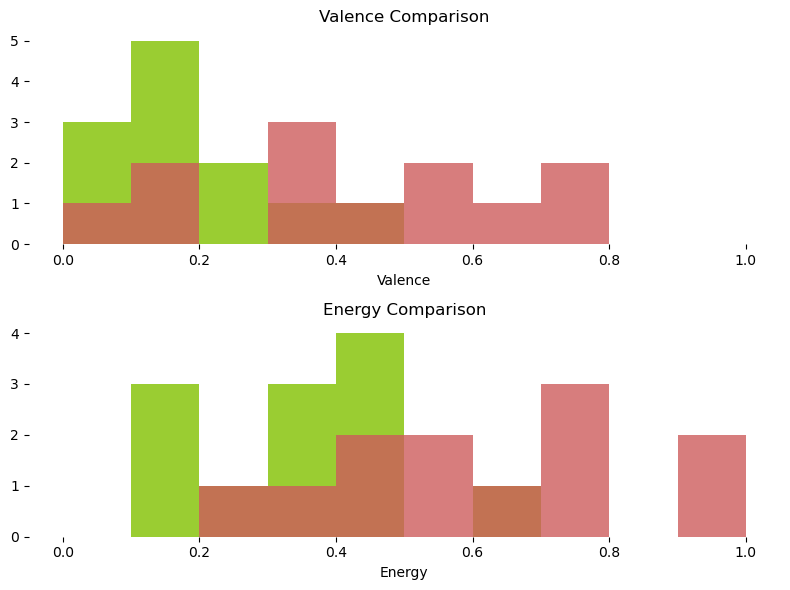

In [146]:
#Valence
fig1, ax1 = plt.subplots(2, figsize=(8, 6))

ax1[0].set_title("Valence Comparison")
ax1[0].set_xlabel("Valence")
ax1[0].hist(friends_df["valence"], range = (0, 1), color = "yellowgreen")
ax1[0].hist(sound_color_df["valence"], range = (0, 1), color = "indianred", alpha = 0.8)
ax1[0].set_frame_on(False)

#Energy
ax1[1].set_title("Energy Comparison")
ax1[1].set_xlabel("Energy")
ax1[1].hist(friends_df["energy"], range = (0, 1), color = "yellowgreen")
ax1[1].hist(sound_color_df["energy"], range = (0, 1), color = "indianred", alpha = 0.8)
ax1[1].set_frame_on(False)

fig1.tight_layout()
plt.show()

#### Scatter plot of valence and energy relationship within each album.

In *Sound & Color* there is a positive correlation in energy and valence once the valence hits 0.3 on the 0-1 scale. There doesn't seem to be a pattern in *Friends That Break Your Heart*

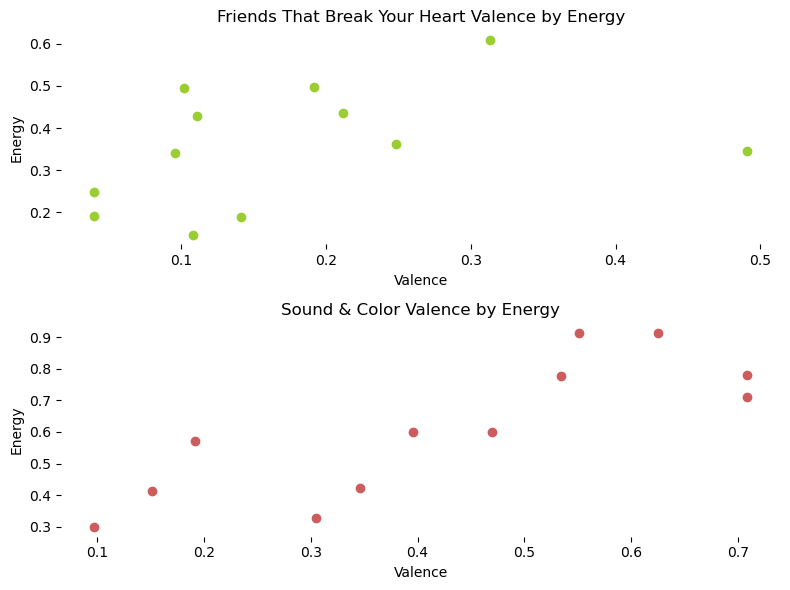

In [147]:
fig2, ax2 = plt.subplots(2, figsize = (8,6))

ax2[0].scatter(x = friends_df["valence"], y = friends_df["energy"], color = "yellowgreen")
ax2[0].set_xlabel("Valence")
ax2[0].set_ylabel("Energy")
ax2[0].set_title("Friends That Break Your Heart Valence by Energy")
ax2[0].set_frame_on(False)

ax2[1].scatter(x = sound_color_df["valence"], y = sound_color_df["energy"], color = "indianred")
ax2[1].set_xlabel("Valence")
ax2[1].set_ylabel("Energy")
ax2[1].set_title("Sound & Color Valence by Energy")
ax2[1].set_frame_on(False)

fig2.tight_layout()
plt.show()

#### Scatter plot of valence and energy on both albums.
You can notice how *Friends That Break Your Heart* has an overall lower scale of energy and valence.

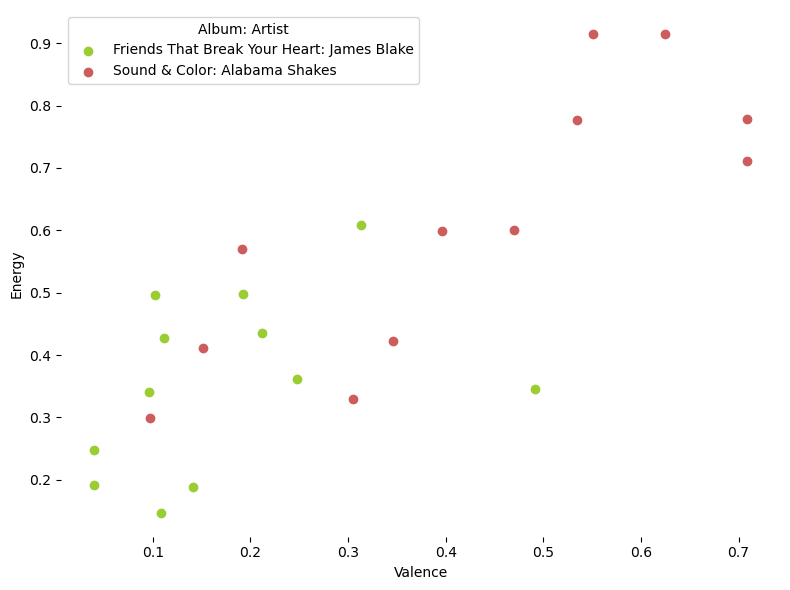

In [148]:
fig3, ax3 = plt.subplots(figsize = (8,6))

ax3.scatter(x = friends_df["valence"], y = friends_df["energy"], color = "yellowgreen")
ax3.scatter(x = sound_color_df["valence"], y = sound_color_df["energy"], color = "indianred")

ax3.set_xlabel("Valence")
ax3.set_ylabel("Energy")
ax3.legend(["Friends That Break Your Heart: James Blake", "Sound & Color: Alabama Shakes"], title = "Album: Artist", loc = "best")
ax3.set_frame_on(False)
fig3.tight_layout()
plt.show()

#### Comparison of energy between *Friends That Break Your Heart* and *Sound & Color* using a scatter/boxplot
The plot shows that when looking at just energy, almost all of the tracks on *Friends That Break Your Heart* falls within the lower half of *Sound & Color*'s energy scores. The latter album exceeds in energy.

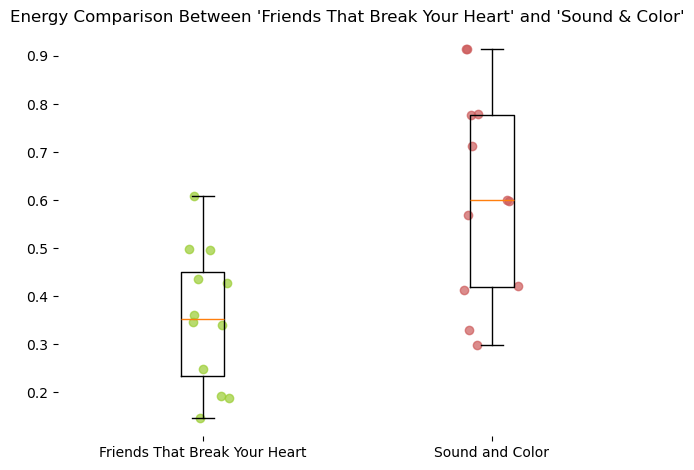

In [149]:
fig4, ax4 = plt.subplots()

ax4.boxplot([friends_df["energy"], sound_color_df["energy"]], tick_labels = ("Friends That Break Your Heart", "Sound and Color"))

#jitter
friends_xs = [1] * len(friends_df["energy"])
sound_color_xs = [2] * len(sound_color_df["energy"])
friends_x_jitter = np.random.uniform(-0.10, .10, len(friends_xs))
sound_color_x_jitter = np.random.uniform(-.10, .10, len(sound_color_xs))

ax4.scatter(x = friends_xs + friends_x_jitter, y = friends_df["energy"], color = "yellowgreen", alpha = 0.7)
ax4.scatter(x = sound_color_xs + sound_color_x_jitter, y = sound_color_df["energy"], color = "indianred", alpha = 0.7)


ax4.set_title("Energy Comparison Between 'Friends That Break Your Heart' and 'Sound & Color'")
ax4.set_frame_on(False)

fig4.tight_layout()
plt.show()

-------
#### Statistical difference between energy and valence of *Friends That Break Your Heart* using the statsmodel's ols function.
The ols model shows that the intercept for the relationship between energy and valence starts at 0.28 on the scale. Each time energy increases by 1, the valence increases by a factor of 0.43, showing a positive correlation. It's not very strong, but it is still positive.


In [150]:
stats.describe(friends_df["energy"])

DescribeResult(nobs=12, minmax=(0.147, 0.609), mean=0.3575, variance=0.02051372727272727, skewness=0.07079693652485652, kurtosis=-1.0008324214195379)

In [151]:
stats.describe(friends_df["valence"])

DescribeResult(nobs=12, minmax=(0.0398, 0.491), mean=0.17445833333333335, variance=0.016705197196969696, skewness=1.2533652417726424, kurtosis=0.9798786432792888)

In [152]:
fit1 = smf.ols("energy ~ valence", data = friends_df).fit()
fit1.summary()

/Users/biancaamoako/opt/anaconda3/envs/data_ematfa24/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1.840
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.205
Time:                        21:36:15   Log-Likelihood:                 7.8281
No. Observations:                  12   AIC:                            -11.66
Df Residuals:                      10   BIC:                            -10.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2813      0.069      4.084      0.002       0.128       0.435
valence        0.4368      0.322      1.356      0.205      -0.281       1.154
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   3.214
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.971
Skew:                           0.045   Prob(JB):                        0.616
Kurtosis:                       1.610   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The graph below shows the relationship between energy and valence throguh a scatter plot and a linear regression line. The correlation is quite strong and positive but there is an outlier that is effecting the regression line's position. 

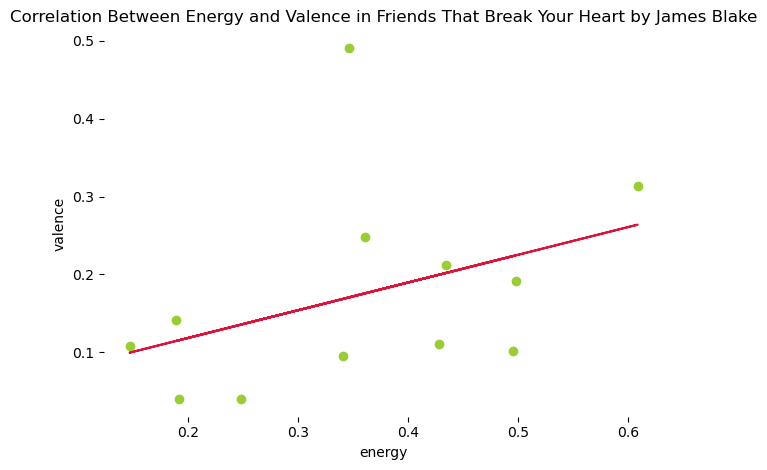

In [153]:
fig5, ax5 = plt.subplots()
x = friends_df["energy"]
y = friends_df["valence"]

#scatter plot from matplotlib
ax5.scatter(x, y, color = "yellowgreen")
ax5.set_xlabel("energy")
ax5.set_ylabel("valence")

#linear regression line using numpy.polyfit()
m, b = np.polyfit(x, y, 1)
ax5.plot(x, m*x + b, color = "crimson")

ax5.set_title("Correlation Between Energy and Valence in Friends That Break Your Heart by James Blake")
ax5.set_frame_on(False)
fig5.tight_layout()
plt.show()

#### The song that is the outlier in the graph above is ["I'm So Blessed Your Mine"](https://www.youtube.com/watch?v=ZMNCImLfnQ4&pp=ygUnaSdtIHNvIGJsZXNzZWQgeW91J3JlIG1pbmUgamFtZXMgYmxha2Ug) with the highest valence of the whole album. 

In [154]:
friends_df[friends_df["valence"] > 0.4]["name"]

5    I'm So Blessed You're Mine
Name: name, dtype: object

-----
#### Sentiment analysis is always helpful to get a better idea of how lyrics impact feature scores. Also, there are usually less than twenty songs on an album and each album is a stand alone obeservation, each track can also be a stand alone observation.
#### Further steps can include focusing on one artist and tracking patterns within their discography. How often is James Blake's music on the lower end of scales in terms of energy and valence? Is there a period of time or album that goes against a pattern? Similarly, how has each artist changed/evolved over time based on the audio features of their albums?